In [1]:
#import dependecies 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Read csv file
df = pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#Checking number of rows and columns before the preprocessing
df.shape

(1252, 7)

In [4]:
#Select only trading cryptocurrencies
trading = df.loc[df['IsTrading'] == True]
#Drop IsTrading column
trading = trading.drop(columns='IsTrading')
trading.shape

(1144, 6)

In [5]:
#Remove all rows that have at least one null value
trading = trading.dropna()
trading.shape

(685, 6)

In [6]:
#Filter for cryptocurrencies that have been mined
mined = trading.loc[df['TotalCoinsMined'] > 0]
mined.shape

(532, 6)

In [7]:
#delete the CoinName and Unamed: 0 columnds from the original dataframe.
new_crypto_df = mined.drop(columns=['CoinName', 'Unnamed: 0'])
new_crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [8]:
#Checking the numner of rows and columns after data cleaning
new_crypto_df.shape

(532, 4)

In [9]:
#Checking that each column holds a correct data type
new_crypto_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [10]:
#Changing TotalCoinSupply columns type into float
new_crypto_df.TotalCoinSupply = new_crypto_df.TotalCoinSupply.astype(float)

In [11]:
#Converting categorical data into numerical data
df_numerical = pd.get_dummies(new_crypto_df, drop_first=True)
df_numerical.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Checking how one hot encoding affected the number of columns
df_numerical.shape
#new_crypto_df['Algorithm'].nunique()
#new_crypto_df['ProofType'].nunique()

(532, 96)

In [13]:
#Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)

In [14]:
#Initialising PCA model
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(scaled_data)

In [15]:
#Transforming PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca
)
df_crypto_pca.shape

(532, 74)

In [16]:
#Initialising t-SNE model
tsne = TSNE(learning_rate=50)

In [17]:
tsne_features = tsne.fit_transform(df_crypto_pca)

c:\users\jyoti\anaconda4\envs\datacoursepython\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [18]:
tsne_features.shape

(532, 2)

In [19]:
# Preparing to plot the dataset

# The first column of transformed features
df_crypto_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_crypto_pca['y'] = tsne_features[:,1]

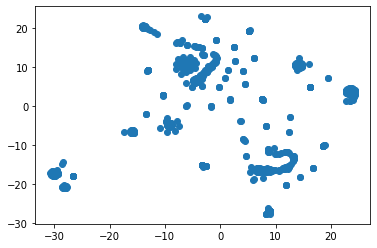

In [20]:
#Visualising the clusters
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show()

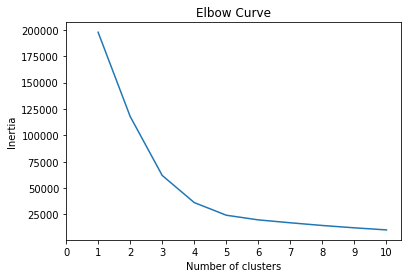

In [21]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
df_tsne = pd.DataFrame(
    data=tsne_features
)
df_tsne.head()

,0,1
0,6.329949,-16.387897
1,12.212941,-11.840310
2,8.700767,-26.070364
3,-29.591982,-17.776730
4,5.118049,19.350800


In [23]:
#Predicting clusters with k=4
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_tsne)
# Predict clusters
predictions = model.predict(df_tsne)
df_tsne["class"] = model.labels_
df_tsne.head()

,0,1,class
0,6.329949,-16.387897,3
1,12.212941,-11.840310,3
2,8.700767,-26.070364,3
3,-29.591982,-17.776730,1
4,5.118049,19.350800,2


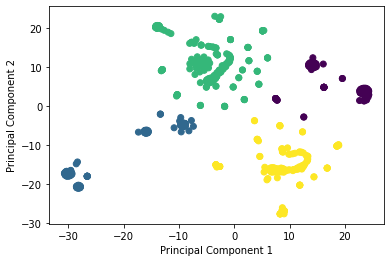

In [24]:
plt.scatter(df_tsne[0], df_tsne[1], c=df_tsne['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()